# This is a Housing price dataset from Kaggle competition
### We need to predict the sale price of the houses based on the given no. of features
    We'll break our approach in five major steps:-
- Exploratory Data Analysis
- Data Cleaning
- Alogrithm Selection
- Model Training
- File Submission

In [1]:
###  importing the required libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import skew, norm

###  this will prevent the warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

###showing decimal values upto 3 values only
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))


In [2]:
###  reading the files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
###  displays the 1st 5 rows of training dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
###   displays the 1st 5 rows of test dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Step 1
### Exploartory Data Analysis (EDA)

In [5]:
###  rows and columns
print(train.shape)
test.shape

(1460, 81)


(1459, 80)

In [6]:
###  Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

###  Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [7]:
###  rows and columns
print(train.shape)
test.shape

(1460, 80)


(1459, 79)

In [8]:
###  checking the null values
print(train.isnull().sum())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [9]:
###  datatypes of the features
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [10]:
###  stats of the training data
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


- these stats won't give such clearified relationships
- hence we plot the heatmap for the correlation between the features

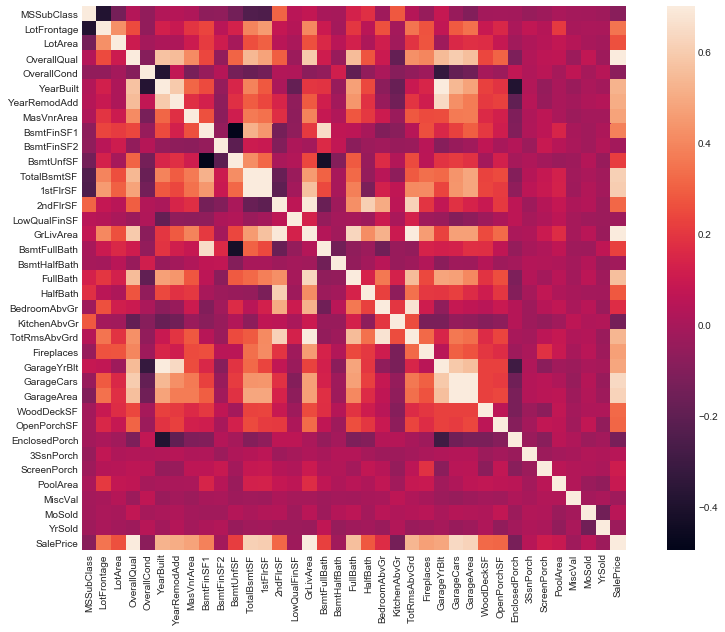

In [11]:
###  analysing the correaltion between the features
plt.figure(figsize=(15, 10))
corr = train.corr()
sns.heatmap(corr, square=True, vmax=0.7)

- This heatmap is a bit messy afterall we expanded the figure also, but doesn't matter as we need to find the correlation of the Sale prices with the other features 
- That can be seen in the last horizontal line

    **Overall quality and Ground living area showed the most positive relation with the sale prices**

### Step 2
### Data Cleaning

In [12]:
###  let's have a loo to the data once again
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


####  Looking for the Outliers

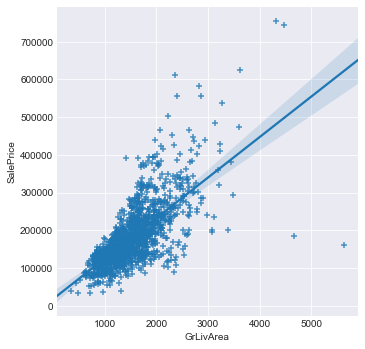

In [13]:
###   using the scatter plot to analyze the Ground Living Area
sns.pairplot(train, x_vars='GrLivArea', y_vars='SalePrice', size=5, aspect=1, markers="+", kind='reg')

- There are two observations at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

In [14]:
###  Removing the outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

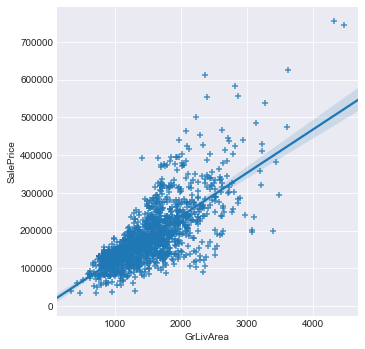

In [15]:
### checking if the outliers are removed
sns.pairplot(train, x_vars='GrLivArea', y_vars='SalePrice', size=5, aspect=1, markers="+", kind='reg')

#### Analysing the target variable :- Sale Price


 mu = 180932.92 and sigma = 79467.79



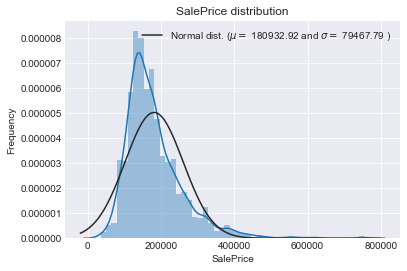

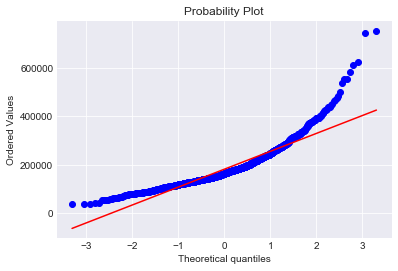

In [16]:
sns.distplot(train['SalePrice'] , fit=norm);

### Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

### Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

### Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

- The black line represents the distribution along the bars which is clearly not fitting properly to the data
- The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

#### Log-transformation of the target variable


 mu = 12.02 and sigma = 0.40



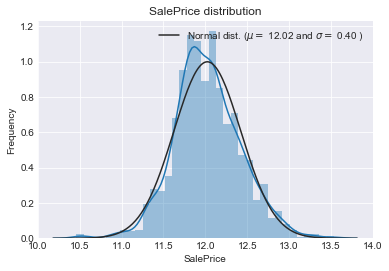

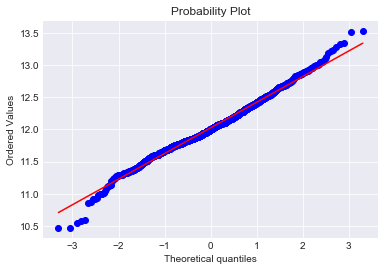

In [17]:
###  The numpy fuction log1p applies log(1+x) to transform all the values of the feature
train["SalePrice"] = np.log1p(train["SalePrice"])

###  Checking the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

###  Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

###  Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

###  Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

- Now the data seems more suitable as the values are more normalized

**Concatinate the train and the test data**

In [18]:
n_train = train.shape[0]
ntest = test.shape[0]

###  removing the target variable from the data dataframe
y_train = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], 1, inplace=True)
data.shape

(2917, 79)

**Missing Values**

In [19]:
###  we'll use the data to adjust with the missing values
###  so that our train and test data remain in same configuration

###  data_na stores the null values of features by %
###  data_na is a dataframe only
data_na = (data.isnull().sum() / len(data)) * 100

###  dropping the features having 0 null values and sorting them in the decending order
###  we'r taking only the first 30 features with the highest % of null values
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]

###  now we are creating the dataframe analyse the missing ratios
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head()

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680


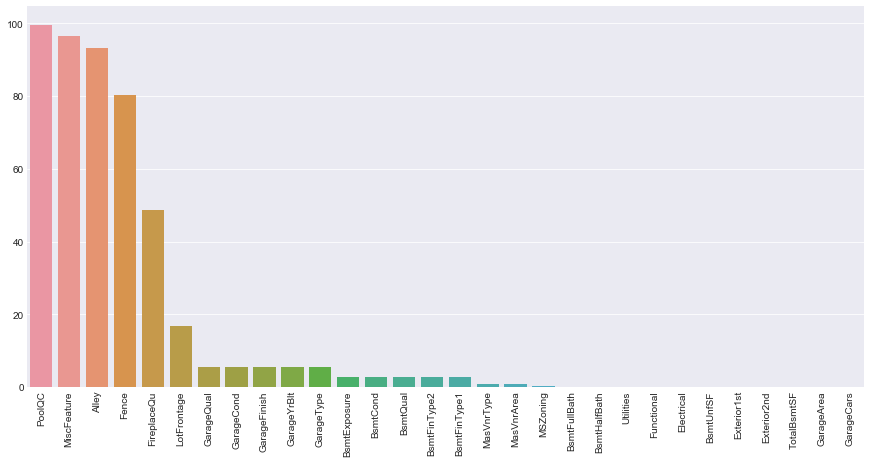

In [20]:
###  let's plot this data
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(x=data_na.index, y=data_na)

- clearly the high bars show that large no. of missing values present in the features

#### Replacing the missing values

- PoolQC : data description says NA means "No Pool".
- MiscFeature : data description says NA means "no misc feature"
- Alley : data description says NA means "no alley access"
- Fence : data description says NA means "no fence"
- FireplaceQu : data description says NA means "no fireplace"

In [21]:
data.PoolQC.fillna('None', inplace=True)
data.MiscFeature.fillna('None', inplace=True)
data.Alley.fillna('None', inplace=True)
data.Fence.fillna('None', inplace=True)
data.FireplaceQu.fillna('None', inplace=True)

- LotFrontage , since the area of street connected to house property is most likely to have the same area as of the neighbourhood houses, we can impute the missing values with their median values of the neighbourhood houses

In [22]:
###  Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood

data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [23]:
#let's check now
data.LotFrontage.isnull().sum()

0

- GarageType
- GarageFinish
- GarageQual
- GarageCond 

In [24]:
for s in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[s].fillna('None', inplace=True)

- GarageYrBlt, GarageArea and GarageCars 
- Replacing missing data with 0 
- Since No garage means there are no cars present in such garage

In [25]:
for s in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[s].fillna(0, inplace=True)

- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF 
- TotalBsmtSF
- BsmtFullBath
- BsmtHalfBath <br>
*If there is no basement then all the missing values present in these features are likely zero for having no basement*

In [26]:
for s in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[s].fillna(0, inplace=True)

- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1 
- BsmtFinType2 <br> 
*For all these categorical basement-related features, NaN means that there is no basement thats we'll replace it by None *

In [27]:
for s in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[s].fillna('None', inplace=True)

- MasVnrArea 
- MasVnrType <br>
*NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type*

In [28]:
data.MasVnrArea.fillna(0, inplace=True)
data.MasVnrType.fillna('None', inplace=True)

- MS Zoning

In [29]:
data.MSZoning.value_counts(dropna=False)

RL         2263
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

In [30]:
###  as mostly there are RL values , so we can replace the missing values by RL 
data.MSZoning.fillna('RL', inplace=True)

- Utilities<br>

In [31]:
data.Utilities.value_counts(dropna=False)

AllPub    2914
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [32]:
###  As there are 2 null values but there is very poor distrubutions of the classes , hence we drop this feature
data.drop(['Utilities'], 1, inplace=True)

- Functional

In [33]:
data.Functional.value_counts(dropna=False)

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64

In [34]:
###  same as above
data.Functional.fillna('Typ', inplace=True)

- Electrical

In [35]:
data.Electrical.value_counts(dropna=False)

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [36]:
###  same as above
data.Electrical.fillna('SBrkr', inplace=True)

- Kitchen Qual

In [37]:
data.KitchenQual.value_counts(dropna=False)

TA     1492
Gd     1151
Ex      203
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

In [38]:
data.KitchenQual.fillna('TA', inplace=True)

- Exterior1st 
- Exterior2nd

In [39]:
print(data.Exterior1st.value_counts(dropna=False))
print('----------------------')
data.Exterior2nd.value_counts(dropna=False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
CBlock        2
Stone         2
AsphShn       2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64
----------------------


VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64

In [40]:
data['Exterior1st'].fillna('VinylSd', inplace=True)
data['Exterior2nd'].fillna('VinylSd', inplace=True)

- Sale Type

In [41]:
data.SaleType.value_counts(dropna=False)

WD       2525
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64

In [42]:
data.SaleType.fillna('WD', inplace=True)

- MSSubClass <br>
*Na most likely means No building class. We can replace missing values with None*

In [43]:
data.MSSubClass.fillna('None', inplace=True)

**Let's check now if we have replaced all the missing values or not**

In [44]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head()

,Missing Ratio


- Looks like that there is no missing values left

### Step 3
### Feature Engineering

- Now first we have noticed that there are some features which have numerical values with the categorical behaviour
- So, let's encode them first

#### Numerically categorical 

In [45]:
###  MSSubClass
data['MSSubClass'] = data['MSSubClass'].apply(str)


###  Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)


###  Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

#### Label Encoding<br>
- We'll now convert the categorical features into the numerical values

In [46]:
###  making a list of the columns
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']

In [47]:
###  importing the label encoder from sklearn 
from sklearn.preprocessing import LabelEncoder

for s in cols:
    label = LabelEncoder()
    label.fit(list(data[s].values))
    data[s] = label.transform(list(data[s].values))

In [48]:
###  let's look at the shape of the data
data.shape

(2917, 78)

- We like to add an interesting feature which will comine all the area of <br>
<br>TotalBsmtSF<br>1stFlrSF<br>2ndFlrSF

In [49]:
data['TotalArea'] = data.TotalBsmtSF + data['1stFlrSF'] + data['2ndFlrSF']

#### Skewed Features

In [50]:
###  this basically selects all the numerical data types feature inot numeric_feats
numeric_feats = data.dtypes[data.dtypes != "object"].index

###  Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

print("\nSkew in numerical features: \n")

skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372


#### Box Cox Transformation of (highly) skewed features

- We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .
- Note that setting  λ=0  is equivalent to log1p used above for the target variable.



In [51]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

###  importing the boxcoxlp module
from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15

for feat in skewed_features:
    #all_data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)
    
###  all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


#### Getting dummies of the categorical features

In [52]:
data = pd.get_dummies(data)

In [53]:
data.shape

(2917, 220)

#### Now let's recreate our train and test datasets

In [54]:
train = data[:n_train]
test = data[n_train:]

In [55]:
print(train.shape)
test.shape

(1458, 220)


(1459, 220)

### Step 4
### Alogrithm Selection

#### Importing Libraries

In [56]:
###  Regularized regression algorithms
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC

###  Tree esembling algorithms techniques
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

###  Other required libraries
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


###  cross-validarion
from sklearn.model_selection import KFold, cross_val_score, train_test_split

###  metrics module
from sklearn.metrics import mean_squared_error

- We'll use the cross val score method to train our algorithm
- But before it we will shuffle the train data

In [57]:
n_folds = 10

def cross(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#### Let's try out the imported models

- Lasso Regression<br>
*This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline*

In [58]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

- Elastic Net Regression <br>
*This model aldo need to be made robust to outliers*



In [59]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

- Kernel Ridge Regression 

In [60]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- Gradient Boosting Regression <br>
*With huber loss that makes it robust to outliers*

In [62]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

### Step 5
### Model Training
- We'll use RMSE as the metric for the testing

- Lasso

In [63]:
score = cross(lasso)
print('\n Score is: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))


 Score is: 0.1099 (0.0140)



- Elastic Net

In [64]:
score = cross(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1098 (0.0141)



- Kernel Ridge

In [65]:
score = cross(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1132 (0.0140)



- Gradient Boosting

In [66]:
score = cross(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1142 (0.0168)



#### Stacking models
- Simplest Stacking approach : Averaging base models
- We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

#### Average Model Class

In [67]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


#### Averaged base models score

- We just average four models here ENet, GBoost, KRR and lasso. We'll take this result into furthur consideration

In [68]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = cross(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1068 (0.0147)



    We achieved a good and low rmse score on the first stacking which is quite good.

#### Final Training and Predictions

In [69]:
###  We define a rmse evaluation function
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [70]:
###  fitting the model
averaged_models.fit(train.values, y_train)

###  finding the trainig data predictions
train_pred = averaged_models.predict(train.values)

###  predicting on the test data set
pred = np.expm1(averaged_models.predict(test.values))

print('The training RMSE is :-')
print(rmse(y_train, train_pred))

The training RMSE is :-
0.07995258539786188


In [72]:
###  no. of predicted values
pred.shape

(1459,)

### Step 5
### Submitting the predictions

In [73]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = pred
sub.to_csv('prices.csv',index=False)

In [94]:
see = pd.read_csv('prices.csv')

In [95]:
see.head()

,Id,SalePrice
0,1458,120141.550
1,1459,163371.596
2,1460,183413.106
3,1461,195619.269
4,1462,194623.199


In [96]:
see.shape

(1459, 2)